In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv("diabetes_dataset.csv")

In [3]:
def remove_df_outliers_iqr(df):
    columns = df.columns
    for column in columns:
        if df[column].dtype != object:
            X = np.array(df[column].values)
            LQ = np.quantile(X, 0.25)
            UQ = np.quantile(X, 0.75)
            IQR = UQ - LQ
            lower_limit = LQ - 1.5 * IQR
            upper_limit = UQ + 1.5 * IQR

            df[df[column] < lower_limit] = None
            df[df[column] > upper_limit] = None
            df = df.dropna()

    return df

In [4]:
def split_data(df):
    y = df['Outcome']
    X = df.drop('Outcome', axis=1)
    return X, y

In [5]:
df = remove_df_outliers_iqr(df)
df.shape

C:\Users\liviu\AppData\Local\Temp\ipykernel_9656\2540386079.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
C:\Users\liviu\AppData\Local\Temp\ipykernel_9656\2540386079.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > upper_limit] = None


(636, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    float64
 1   Glucose                   636 non-null    float64
 2   BloodPressure             636 non-null    float64
 3   SkinThickness             636 non-null    float64
 4   Insulin                   636 non-null    float64
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    float64
 8   Outcome                   636 non-null    float64
dtypes: float64(9)
memory usage: 49.7 KB


In [7]:
df = remove_df_outliers_iqr(df)

In [8]:
X, y = split_data(df)

In [9]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               592 non-null    float64
 1   Glucose                   592 non-null    float64
 2   BloodPressure             592 non-null    float64
 3   SkinThickness             592 non-null    float64
 4   Insulin                   592 non-null    float64
 5   BMI                       592 non-null    float64
 6   DiabetesPedigreeFunction  592 non-null    float64
 7   Age                       592 non-null    float64
dtypes: float64(8)
memory usage: 41.6 KB
<class 'pandas.core.series.Series'>
Int64Index: 592 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype  
--------------  -----  
592 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


(None, None)

In [10]:
def correlation(x1, x2):
    # sum( ( x1i - x10) * (x2i - x20) ) / sqrt (sum (x1i - x10) ^ 2 * sum( x2i-x20) ^ 2)
    x10 = np.mean(x1)
    x20 = np.mean(x2)

    x1_dif = x1 - x10   # because x1 is array it will substract x10 from each element of x1 array
    x2_dif = x2 - x20

    x1_dif_sq = x1_dif ** 2
    x2_dif_sq = x2_dif ** 2

    top = np.sum(x1_dif * x2_dif)
    bottom = np.sqrt(np.sum(x1_dif_sq) * np.sum(x2_dif_sq))

    try:
        coef = top / bottom
        return coef
    except Exception as e:
        raise e

In [11]:
def compute_correlation_matrix(X):
    correlation_matrix = []

    for column1 in X.columns:
        correlation_row = []
        for column2 in X.columns:
            x1 = np.array(X[column1].values)
            x2 = np.array(X[column2].values)
            coeff = correlation(x1, x2)
            correlation_row.append(coeff)

        correlation_matrix.append(correlation_row)

    correlation_matrix = np.array(correlation_matrix)
    return correlation_matrix


In [12]:
def remove_correlated_columns(correlation_matrix, X):
    min_correlation_coeff_threshold = -0.75
    max_correlation_coeff_threshold = 0.75

    columns_to_remove = []
    n_features = len(X.columns)
    for i in range(n_features):
        for j in range(i+1, n_features):
            if correlation_matrix[i, j] > max_correlation_coeff_threshold or correlation_matrix[i, j] < min_correlation_coeff_threshold:
                columns_to_remove.append(j)

    columns_to_remove_names = []
    for col_index in columns_to_remove:
        columns_to_remove_names.append(X.columns[col_index])
        X = X.drop(columns_to_remove_names, axis=1)
    
    return X

In [13]:
#remove correlated features
corr_matrix = compute_correlation_matrix(X)
#no need to remove any columns as there is no strong correlation between any columns
corr_matrix

array([[ 1.00000000e+00,  1.38381441e-01,  1.83476647e-01,
        -1.00502025e-01, -1.18645864e-01,  3.60014398e-02,
         3.51851030e-03,  6.19727270e-01],
       [ 1.38381441e-01,  1.00000000e+00,  2.47394974e-01,
        -9.29873884e-04,  2.51255097e-01,  1.81981020e-01,
         3.82807088e-02,  2.48502960e-01],
       [ 1.83476647e-01,  2.47394974e-01,  1.00000000e+00,
         2.35462206e-02, -5.11302711e-02,  2.76612471e-01,
         1.29177873e-02,  3.55600682e-01],
       [-1.00502025e-01, -9.29873884e-04,  2.35462206e-02,
         1.00000000e+00,  4.80951360e-01,  3.67397676e-01,
         1.63766254e-01, -1.14034448e-01],
       [-1.18645864e-01,  2.51255097e-01, -5.11302711e-02,
         4.80951360e-01,  1.00000000e+00,  1.71975895e-01,
         2.31413558e-01, -8.57546723e-02],
       [ 3.60014398e-02,  1.81981020e-01,  2.76612471e-01,
         3.67397676e-01,  1.71975895e-01,  1.00000000e+00,
         1.28884370e-01,  1.01057807e-01],
       [ 3.51851030e-03,  3.828070

In [14]:
def min_max_scale(x):
    x_min = np.min(x)
    x_max = np.max(x)

    x_scaled = (x - x_min) / (x_max - x_min)
    return x_scaled

In [15]:
#just to be safe I scaled all the columns:

for column in X.columns:
    X[column] = min_max_scale(X[column])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.707483,0.466667,0.583333,0.000000,0.511628,0.539293,0.725
1,0.076923,0.278912,0.366667,0.483333,0.000000,0.279070,0.268173,0.250
2,0.615385,0.945578,0.333333,0.000000,0.000000,0.169435,0.583497,0.275
3,0.076923,0.306122,0.366667,0.383333,0.313333,0.328904,0.087426,0.000
5,0.384615,0.489796,0.500000,0.000000,0.000000,0.245847,0.120825,0.225


In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train.shape, X_test.shape

((473, 8), (119, 8))

In [19]:
clf = clf.fit(X_train, np.array(y_train, dtype=float))

[Text(0.5940126050420168, 0.9705882352941176, 'X[1] <= 0.67\ngini = 0.406\nsamples = 473\nvalue = [339, 134]'),
 Text(0.30987394957983194, 0.9117647058823529, 'X[1] <= 0.391\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.15126050420168066, 0.8529411764705882, 'X[4] <= 0.5\ngini = 0.084\nsamples = 160\nvalue = [153, 7]'),
 Text(0.08403361344537816, 0.7941176470588235, 'X[4] <= 0.292\ngini = 0.051\nsamples = 152\nvalue = [148, 4]'),
 Text(0.03361344537815126, 0.7352941176470589, 'X[0] <= 0.885\ngini = 0.015\nsamples = 129\nvalue = [128, 1]'),
 Text(0.01680672268907563, 0.6764705882352942, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.05042016806722689, 0.6764705882352942, 'X[7] <= 0.562\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03361344537815126, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06722689075630252, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13445378151260504, 0.7352941176470589, 'X[4] <= 0.

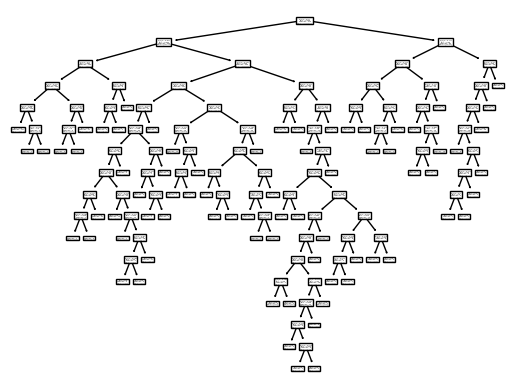

In [20]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [21]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [22]:
train_acc = accuracy_score(np.array(y_train, dtype=float), y_train_pred)
test_acc = accuracy_score(np.array(y_test, dtype=float), y_test_pred)

In [23]:
print(f"Training set accuracy: {train_acc * 100}%. Test set accuracy: {test_acc * 100}%")
#since the set accuracy is 100% the model is overfitting

Training set accuracy: 100.0%. Test set accuracy: 63.86554621848739%


In [24]:
#in order to optimize and resolve the overfitting I shall try the GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_leaf': [1, 5, 10, 25, 50, 100]
}
combinations = []

for criterion in parameters["criterion"]:
  for max_depth in parameters["max_depth"]:
    for min_samples_leaf in parameters["min_samples_leaf"]:
      combination = {
        "criterion": criterion,
        "max_depth": max_depth,
        "min_samples_leaf": min_samples_leaf
      }
      combinations.append(combination)

In [25]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
models_grid = GridSearchCV(model, parameters)
models_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19, 20],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]})

In [26]:
models_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

Since the dataset is not to big I increased the test size from 20% to 40%

[Text(0.6764705882352942, 0.9, 'X[1] <= 0.755\nentropy = 0.854\nsamples = 355\nvalue = [256, 99]'),
 Text(0.47058823529411764, 0.7, 'X[1] <= 0.391\nentropy = 0.731\nsamples = 318\nvalue = [253, 65]'),
 Text(0.23529411764705882, 0.5, 'X[4] <= 0.292\nentropy = 0.281\nsamples = 123\nvalue = [117, 6]'),
 Text(0.11764705882352941, 0.3, 'X[0] <= 0.577\nentropy = 0.082\nsamples = 98\nvalue = [97, 1]'),
 Text(0.058823529411764705, 0.1, 'entropy = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.17647058823529413, 0.1, 'entropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.35294117647058826, 0.3, 'X[0] <= 0.115\nentropy = 0.722\nsamples = 25\nvalue = [20, 5]'),
 Text(0.29411764705882354, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.4117647058823529, 0.1, 'entropy = 0.918\nsamples = 15\nvalue = [10, 5]'),
 Text(0.7058823529411765, 0.5, 'X[7] <= 0.237\nentropy = 0.884\nsamples = 195\nvalue = [136, 59]'),
 Text(0.5882352941176471, 0.3, 'X[5] <= 0.352\nentropy = 0.657\nsamples = 1

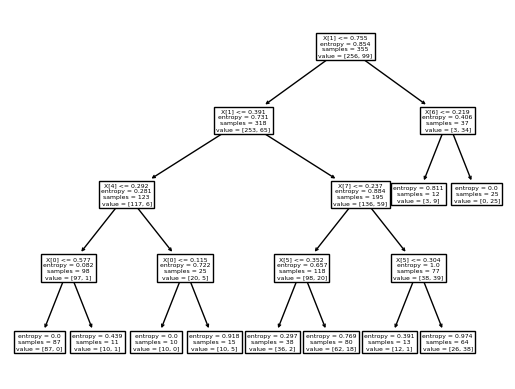

In [27]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = clf.fit(X_train, np.array(y_train, dtype=float))

plot_tree(clf)

In [28]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(np.array(y_train, dtype=float), y_train_pred)
test_acc = accuracy_score(np.array(y_test, dtype=float), y_test_pred)

print(f"Training set accuracy: {train_acc * 100}%. Test set accuracy: {test_acc * 100}%")

Training set accuracy: 84.22535211267605%. Test set accuracy: 75.10548523206751%


In [29]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_predicted)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predicted)

print(f"Trainning set accuracy = {train_accuracy*100}. Test set accuracy = {test_accuracy*100}.")

Trainning set accuracy = 100.0. Test set accuracy = 69.74789915966386.


In [30]:
parameters = {
    'n_estimators': [1,3,5,7,9,15,20,30,40,50,60,70,80,90,100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 10, 11],
    'min_samples_leaf': [1, 5, 10, 25],
    'max_features': ['sqrt', 'log2', 'None']
}
combinations = []
for n_estimator in parameters["n_estimators"]:
    for criterion in parameters["criterion"]:
        for max_depth in parameters["max_depth"]:
            for min_samples_leaf in parameters["min_samples_leaf"]:
                for max_feature in parameters["max_features"]:
                    combination = {
                    "n_estimators": n_estimator,
                    "criterion": criterion,
                    "max_depth": max_depth,
                    "min_samples_leaf": min_samples_leaf,
                    "max_features": max_feature
                    }
                    combinations.append(combination)

In [31]:
model = RandomForestClassifier()
models_grid = GridSearchCV(model, parameters)
models_grid.fit(X_train, y_train)

C:\Users\liviu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5400 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\liviu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\liviu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=60)

In [33]:
models_grid.best_estimator_

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=60)

In [38]:
model = RandomForestClassifier(n_estimators=60 , criterion='gini', max_depth=11, max_features='log2')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = model.fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_predicted)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predicted)

print(f"Trainning set accuracy = {train_accuracy*100}. Test set accuracy = {test_accuracy*100}.")

Trainning set accuracy = 100.0. Test set accuracy = 74.26160337552743.
